
# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>#### **Question that can analyised from this data set**
> 1. What kind of film changes over time? What types of movies are taken more often?
> 2. What is Average runtime of the movies?
> 3. Is there any relation between popularity and year of release in movies?
> 4. How many movies are based on novel ?
> 5. Which type of movies make more profit, based on novel or original ?
> 6. What are top 5 production companies?

In [1]:
#import packages

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import json
import wordcloud
from datetime import datetime
from wordcloud import WordCloud


<a id='wrangling'></a>
## Data Wrangling


>### General Properties

In [2]:
# Load data

df_movies=pd.read_csv("tmdb_5000_movies.csv")
df_credits=pd.read_csv("tmdb_5000_credits.csv")

In [3]:
#print number of rows and feature in each data set.

print('Movie data information set：', df_movies.shape, '\nActors data information set：', df_credits.shape, '\n')

Movie data information set： (4803, 20) 
Actors data information set： (4803, 4) 



In [4]:
#printing top 5 vale of movie data

df_movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#printing top 5 vale of actor data

df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
print("Rows in movie dataset")
print(len(df_movies))
print()
print("Number of rows in Actor dataset")
print(len(df_credits))
print()
print('Feature of movie dataset')
print(df_movies.columns)
print()
print("Feature of Actor dataset")
print(df_credits.columns)

Rows in movie dataset
4803

Number of rows in Actor dataset
4803

Feature of movie dataset
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Feature of Actor dataset
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [7]:
# total number of same values in column title and original_title in movies dataset

num_same=(df_movies["original_title"]==df_movies["title"]).sum()
print("Number of same title {}".format(num_same))


Number of same title 4542


### Current thoughts about dataset
>There are same number of rows in both data set and each row curresponds to a single movie , we have to merge them.

>There are some feature that have most of the values common we have to remove that kind if feature.

>Movie dataset has an *id* column and Actor dataset has an *movie_id* column

>Movie dataset has approx one same title 

## Data Cleaning (Removing unrequired data from dataset)


>### Removing duplicate columns and unnecessary columns

In [8]:
#remove unrequired and dublicate columns

del df_credits['movie_id']
del df_credits['title']
del df_movies['homepage']
del df_movies['spoken_languages']
del df_movies['original_title']
del df_movies['tagline']
del df_movies['overview']
del df_movies['status']

In [9]:
#print top value of actor dataset

df_credits.head()

,cast,crew
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
#print top 5 values of movies dataset

df_movies.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124


In [11]:
#Merge movies and credits dataset 

full = pd.concat([df_movies, df_credits], axis=1)

#print top 5 values of merged dataset

full.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
#look for missing values

full.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

**Missing Data**

>There are 2 runtime missing data

>There are 1 release_date missing data

In [13]:
#Runtime missing data Rows

full.loc[full['runtime'].isnull(),:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [14]:
#placing data from IMDb site

full.loc[2656, 'runtime'] = 98
full.loc[4140, 'runtime'] = 81

#print after placing runtime missing data

full.loc[[2656, 4140], :]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,98.0,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,81.0,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [15]:
full.loc[full['release_date'].isnull(), :]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,0.0,[],[],NaN,0,0.0,America Is Still the Place,0.0,0,[],[]


In [16]:
#deleting row as it is almost empty

full.drop(full.index[full.release_date.isnull()],inplace=True)

In [17]:
# Extract useful information 

cols = ['genres', 'keywords', 'production_companies', 'production_countries', 'cast', 'crew']    

     
def get_names(x):    
    x=','.join([i['name'] for i in x])
    return x.split(",")


for i in cols:
    full[i] = full[i].apply(json.loads)
    full[i] = full[i].apply(get_names)

    
full.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."


In [18]:
#deleting rows containg 0 or empty string in dataset

full.drop(full.index[full.revenue<10],inplace=True)
full.drop(full.index[full.budget<10],inplace=True)
full.drop(full.index[full.revenue==0],inplace=True)
full.drop(full.index[full.astype(str)["genres"]=="['']"],inplace=True )
full.drop(full.index[full.astype(str)["keywords"]=="['']"],inplace=True)
full.drop(full.index[full.astype(str)["production_companies"]=="['']"],inplace=True)


In [19]:
#checking production_countries empty values

full[full.astype(str)["production_countries"]=="['']"]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
272,90000000,"[Comedy, Romance]",24113,"[architect, cellist, friends, anniversary]",en,1.004579,[New Line Cinema],[],2001-04-27,10372291,104.0,Town & Country,3.7,16,"[Warren Beatty, Diane Keaton, Goldie Hawn, Gar...","[Buck Henry, Peter Chelsom, James Brown]"
1932,25000000,"[Action, Adventure, Comedy, Fantasy, Science F...",24264,"[africa, mercenary, adventure, female hero, ju...",en,4.020194,"[Columbia Pictures Corporation, Delphi II Prod...",[],1984-08-17,5778353,117.0,Sheena,5.0,22,"[Tanya Roberts, Ted Wass, Donovan Scott, Eliza...","[David Newman, John Guillermin, Lorenzo Semple..."


In [20]:
#placing data from IMDb site
full.loc[272,"production_countries"]= "Downtown,Los Angeles,California,USA"
full.loc[1932,"production_countries"]= "USA"

In [21]:
full[(full.astype(str)["cast"]=="['']")]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
4617,300000,[Documentary],73981,"[philosophy, india, healing]",en,0.055868,"[Pandora Filmproduktion, Monsoon Films Private...","[India, Switzerland, Germany]",2001-09-20,2074000,101.0,Ayurveda: Art of Being,5.5,3,[],[Pan Nalin]


In [22]:
full.loc[4617,"cast"]= ['Nicolos Kostopoulos']

>At present point all the Missing Data and empty values has been fixed

In [23]:
#Getting month and year for release date

year = full.release_date.map(lambda x:(datetime.strptime(x,'%Y-%m-%d').year))
month = full.release_date.map(lambda x:(datetime.strptime(x, '%Y-%m-%d')).month)
full['release_year'] = year
full['release_month'] = month
del full['release_date']


In [24]:
#print top 5 values of dataset
full.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,cast,crew,release_year,release_month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,162.0,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",2009,12
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2007,5
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",880674609,148.0,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",2015,10
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],1084939099,165.0,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",2012,7
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,43.926995,[Walt Disney Pictures],[United States of America],284139100,132.0,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",2012,3


In [25]:
full.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month
count,3.096000e+03,3096.000000,3096.000000,3.096000e+03,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,4.164114e+07,44535.119186,29.968784,1.253232e+08,111.076227,6.324128,1013.214147,2001.629199,7.004845
std,4.483603e+07,75250.403871,36.599518,1.888768e+08,21.020215,0.865062,1432.447284,13.304636,3.367378
min,1.000000e+01,5.000000,0.039007,1.100000e+01,41.000000,0.000000,0.000000,1916.000000,1.000000
25%,1.100000e+07,4514.500000,11.231583,1.862439e+07,97.000000,5.800000,200.750000,1998.000000,4.000000
50%,2.700000e+07,11131.000000,21.298696,5.930361e+07,107.000000,6.400000,502.500000,2005.000000,7.000000
75%,5.600000e+07,44842.500000,38.185652,1.512445e+08,121.000000,6.900000,1189.750000,2010.000000,10.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,2016.000000,12.000000


In [26]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 0 to 4798
Data columns (total 17 columns):
budget                  3096 non-null int64
genres                  3096 non-null object
id                      3096 non-null int64
keywords                3096 non-null object
original_language       3096 non-null object
popularity              3096 non-null float64
production_companies    3096 non-null object
production_countries    3096 non-null object
revenue                 3096 non-null int64
runtime                 3096 non-null float64
title                   3096 non-null object
vote_average            3096 non-null float64
vote_count              3096 non-null int64
cast                    3096 non-null object
crew                    3096 non-null object
release_year            3096 non-null int64
release_month           3096 non-null int64
dtypes: float64(3), int64(6), object(8)
memory usage: 515.4+ KB


### At this point we have

> 1. Combined two dataset into one named full.
> 2. removed unused column.
> 3. Removing the duplicacy in the rows.
> 4. Replacing some missing value from IMDb site.
> 5. Some values in the database have zero values, discarding such entries.
> 6. converting release date into two feature release year and release month.
> 7. Removing NAN values.
 

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 
> ###  What kind of film changes over time? What types of movies are taken more often?

In [27]:
#types of genres present in data

genre_set = set()
for x in full['genres']:
    genre_set.update(x)
genre_set.discard('')
genre_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [28]:
#creating genre dataframe showing for each row what type of genre are present
#here 0 represent absence and 1 represents present of specific genre

df_genre = pd.DataFrame()

# Add the year column of the original data set to df_genre
df_genre['year']=full['release_year']

for genre in genre_set:
    df_genre[genre] = full.astype(str)['genres'].str.contains(genre).map(lambda x:1 if x else 0)

df_genre.head()

,year,Comedy,War,Action,Horror,Adventure,Romance,Documentary,Western,Family,History,Foreign,Crime,Science Fiction,Thriller,Animation,Drama,Mystery,Music,Fantasy
0,2009,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2007,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2012,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4,2012,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
# Group df_genre by year

genre_by_year =df_genre.groupby('year').sum()  #groupby, the year column is automatically converted to df.index with the default parameter as_index=True.

In [30]:
genre_by_year.head()

,Comedy,War,Action,Horror,Adventure,Romance,Documentary,Western,Family,History,Foreign,Crime,Science Fiction,Thriller,Animation,Drama,Mystery,Music,Fantasy
year,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1925,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1927,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1929,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1930,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [31]:
for i in list(genre_by_year.columns):
    if sum(genre_by_year[i])<600:
        del(genre_by_year[i])

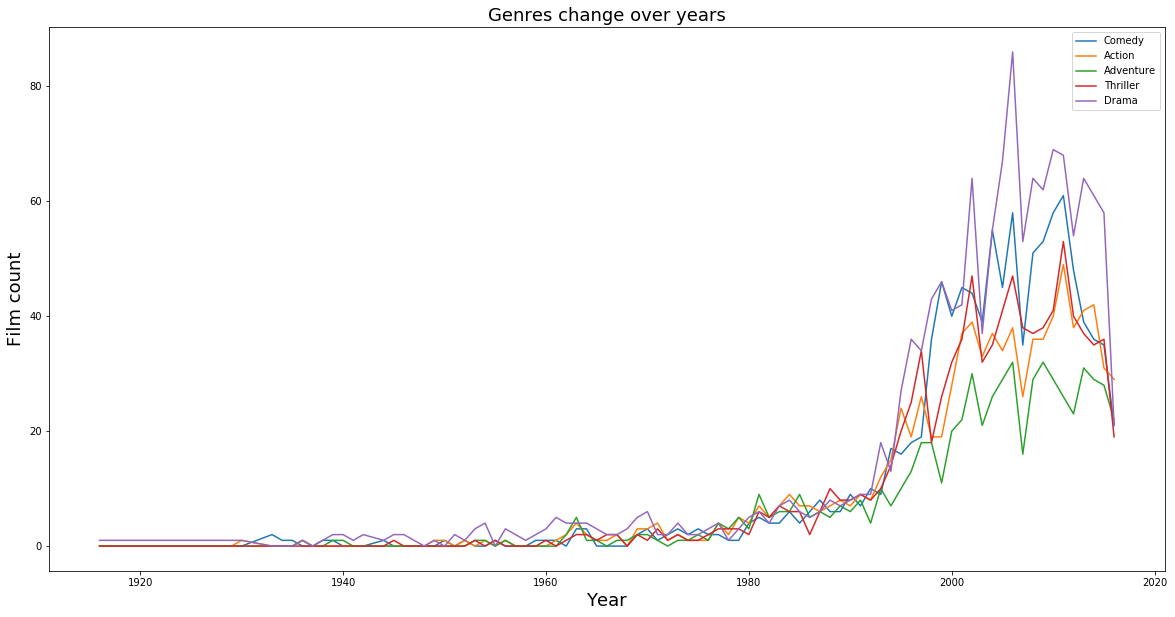

In [32]:
plt.figure(figsize=(20,10))
plt.plot(genre_by_year)  
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Film count',fontsize = 18)
plt.title('Genres change over years',fontsize = 18)
plt.legend(genre_by_year)

plt.show()

From the above plot 
> 1. Around 1980 there is sudden change in genre in movies as Drama increased abruptl.
> 2. Drama,Comedy and Thriller Genre are top 3 genre.

In [33]:
genre_sum_by_year = genre_by_year.sum()
genre_sum_by_year

Comedy       1044
Action        886
Adventure     650
Thriller      910
Drama        1374
dtype: int64

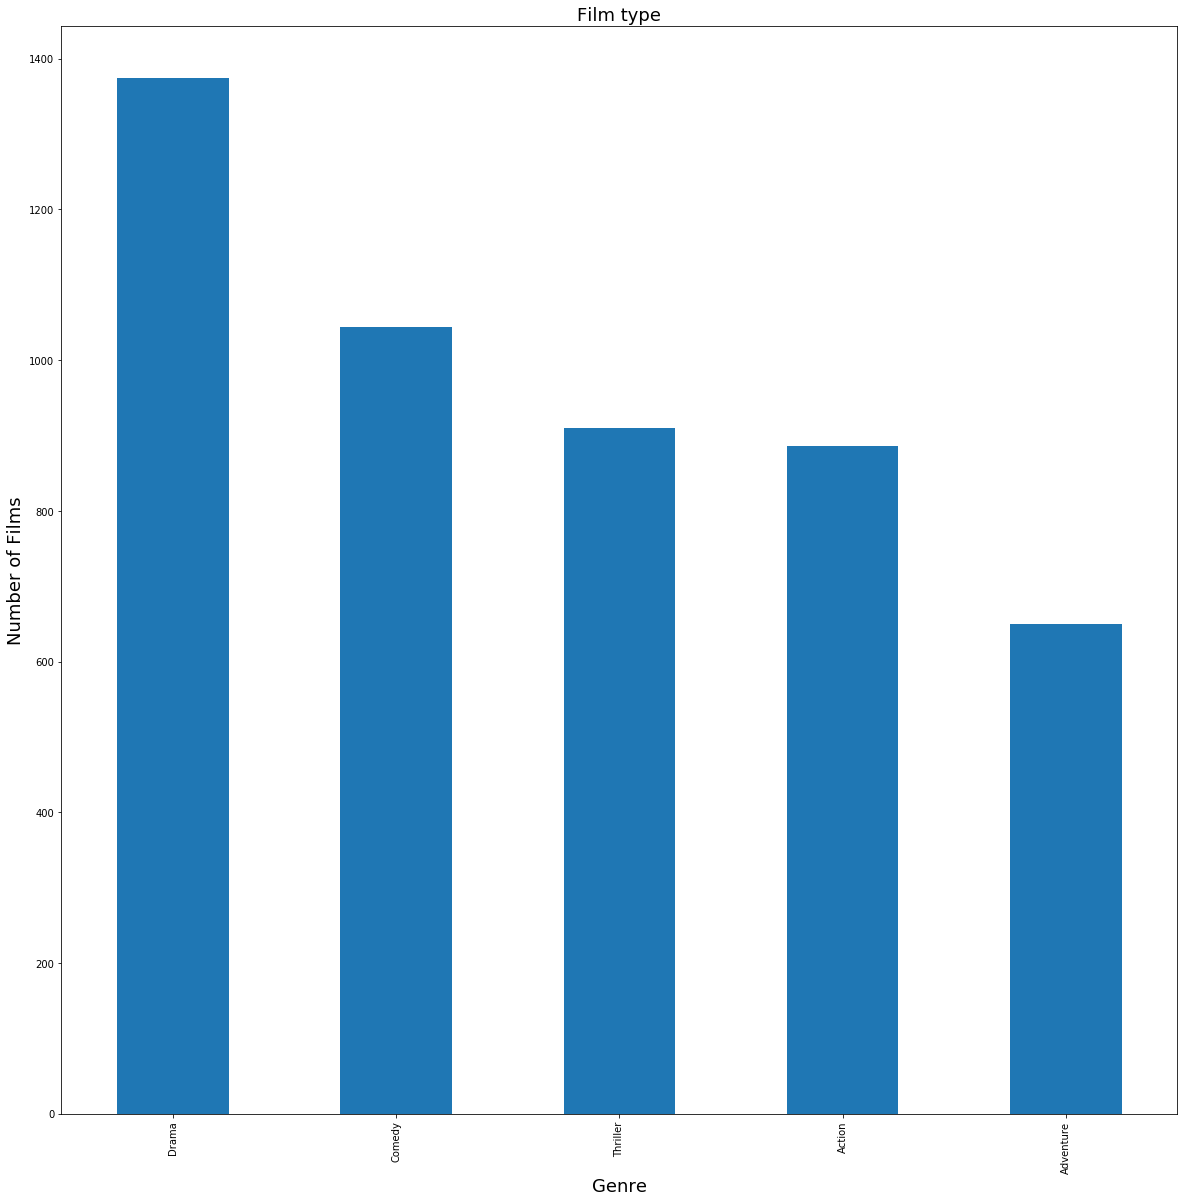

In [34]:
#Bar graph showing what type of movies are made more often

plt.figure(figsize = (20,20))
genre_sum_by_year.sort_values(ascending=False).plot.bar()
plt.xlabel('Genre',fontsize = 18)
plt.ylabel('Number of Films',fontsize = 18)
plt.title('Film type',fontsize = 18)
plt.show()

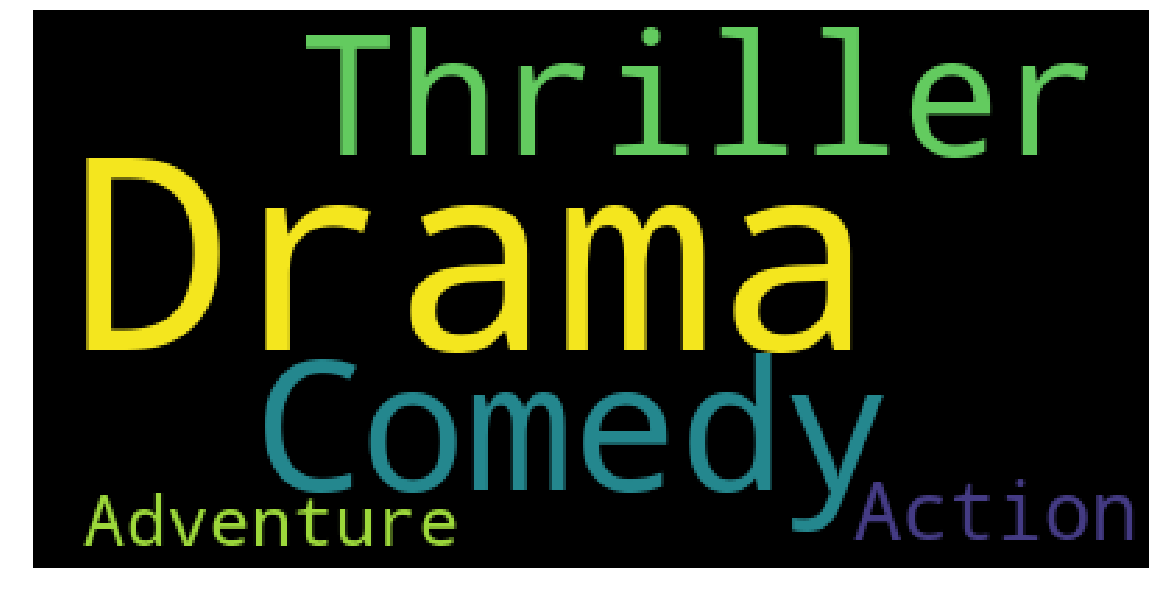

In [35]:
wc = WordCloud()
wc=wc.generate_from_frequencies(genre_sum_by_year.to_dict())
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Research Question 2  
>###  What is Average runtime of the movies?


In [36]:
average_Runtime=full.runtime.mean()
print(average_Runtime)

111.07622739018088


> Average runtime is about 111 mins.

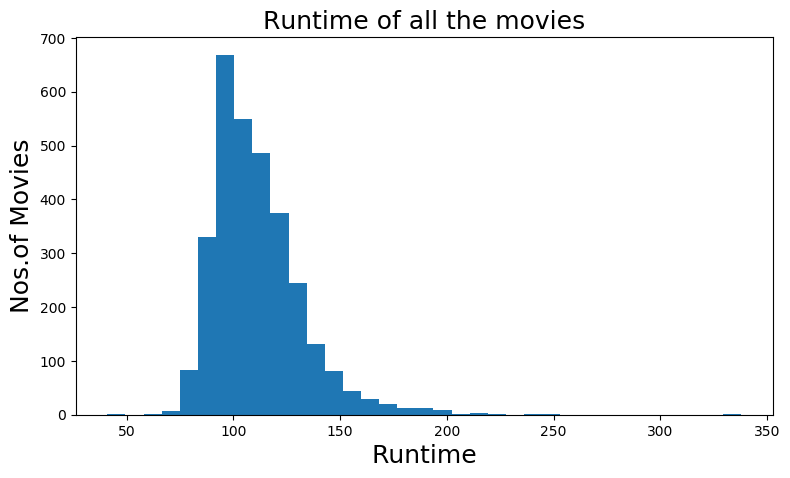

In [37]:
#visualize
plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('Runtime',fontsize = 18)
plt.ylabel('Nos.of Movies',fontsize = 18)
plt.title('Runtime of all the movies',fontsize = 18)
plt.hist(full['runtime'],bins =35)
plt.show()

The Graph is +vely skewed most of the movies runtime is between 100-120 mins

In [38]:
full.runtime.describe()

count    3096.000000
mean      111.076227
std        21.020215
min        41.000000
25%        97.000000
50%       107.000000
75%       121.000000
max       338.000000
Name: runtime, dtype: float64

> About 75% of movies in dataset has runtime below 121 min.

> Lowest runtime is 41 mins and hightest runtime is 338 mins

## Research Question 3
>###  Is there any relation between popularity and year of release in movies?


In [39]:
corr=full.corr()

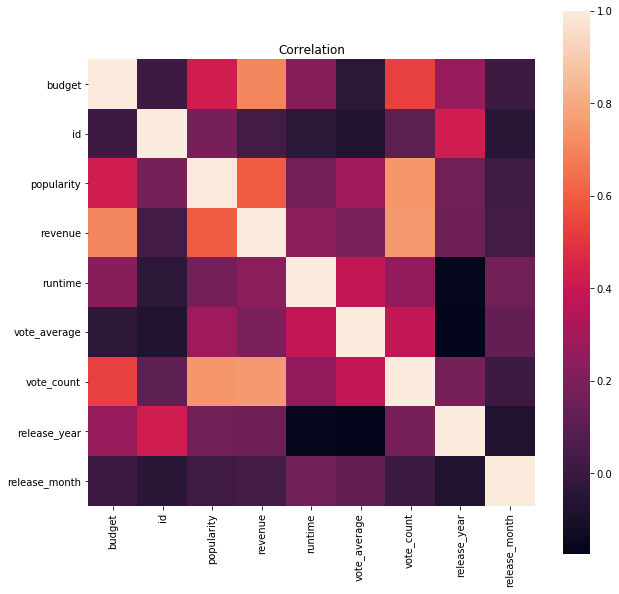

In [40]:
plt.figure(figsize = (10,10))
sn.heatmap(corr,square=True,robust=True)
plt.title("Correlation")

From above figure we can conclude that there is no relation between year of release and popularity

## Research Question 4
>###  How many movies are based on novel ? Which type of movies make more profit, based on novel or original ?

In [41]:
#Create a data block on originality
orginal_novel = pd.DataFrame()
orginal_novel['keywords'] = full.astype("str").keywords.str.contains('based on').map(lambda x:1 if x else 0)
orginal_novel[['revenue','budget']]=full[['revenue','budget']]
orginal_novel['profit']=full['revenue']-full['budget']
orginal_novel1 = orginal_novel.groupby('keywords',as_index=False).mean()
orginal_novel.head()



,keywords,revenue,budget,profit
0,0,2787965087,237000000,2550965087
1,0,961000000,300000000,661000000
2,1,880674609,245000000,635674609
3,0,1084939099,250000000,834939099
4,1,284139100,260000000,24139100


In [42]:
org_vs_novel = pd.DataFrame()
org_vs_novel['count'] = [full.shape[0]-full.astype("str").keywords.str.contains('based on').sum(),
                        full.astype("str").keywords.str.contains('based on').sum()]
org_vs_novel['profit']=orginal_novel1['profit']
org_vs_novel.index=['orginal works','based on novel']
org_vs_novel

,count,profit
orginal works,2705,7.646986e+07
based on novel,391,1.335769e+08


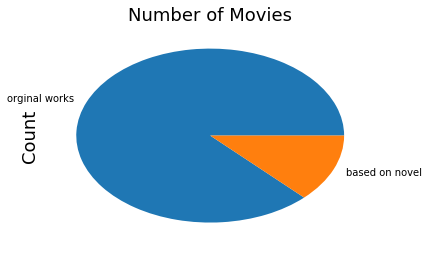

In [43]:
org_vs_novel["count"].plot.pie()
plt.title("Number of Movies",fontsize = 18)
plt.ylabel("Count",fontsize=18)

From above Graph Movies based on novel makes more profit as compared to original movies

## Research Question 5
>### Which type of movies make more profit, based on novel or original 


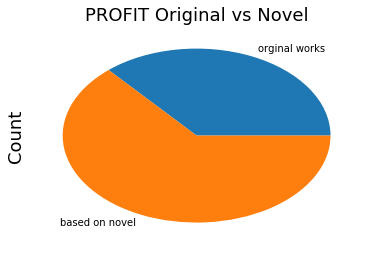

In [44]:
org_vs_novel.profit.plot.pie()
plt.title("PROFIT Original vs Novel",fontsize = 18)
plt.ylabel("Count",fontsize=18)

From above Bar graph we can say that The number of movies based on novel is comparitively very less to the original movies

## Research Question 6
>###  What are top 5 production companies?


In [45]:
#production coumny
prod_companies=set()
for i in full.production_companies:
    for j in i:
        if j not in prod_companies:
            prod_companies.add(j)

In [46]:
#creating dataframe of all production companies
df_prodCompany = pd.DataFrame()


for i in prod_companies:
    df_prodCompany[i] = full.astype(str).production_companies.str.contains(i).map(lambda x:1 if x else 0)

df_prodCompany.head()

C:\Users\ratne\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,Crying Box Productions,Down Productions,Svenska Filminstitutet (SFI),Mainstream S.A.,TC Productions,VIP Medienfonds 4,Ashton Productions,Oregon Film Factory,Dune Films,Living Films,...,Feigco Entertainment,NDF International,SW7D Productions,Toho Company,Sunswept Entertainment,Talisman Productions,Bad Hat Harry Productions,A.J.O.Z. Films,19 Entertainment,Initial Entertainment Group (IEG)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#del minor production companies
for i in prod_companies:
    if df_prodCompany[i].sum()<200:
        del(df_prodCompany[i])

In [48]:
df_prodCompany.sum()

Columbia Pictures     252
Universal             280
Paramount Pictures    241
Paramount             257
Universal Pictures    271
Warner Bros.          286
dtype: int64

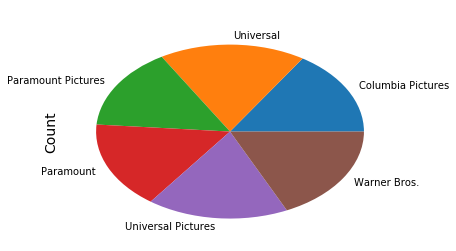

In [50]:
df_prodCompany.sum().plot.pie()
plt.title("Movies Produced",color="w")
plt.ylabel("Count",fontsize=14)

From above bar graph we can say that Warner Bros. is the top production companies with total 286 produced movies, followed by universal, universal Pictures, Paramount Pictures, Paramount.

<a id='conclusions'></a>
## Conclusions
>1. Drame, Comedy, Thriller and Action are four most-made genres. The number of drama is the most.
>2. Average duration of the movie is 111 minutes 
>3. Drama is the most popular genre, following by action, comedy and thriller.
>4. Movies based on novel makes more profit as compared to original movies.
>5. The number of movies based on novel is comparitively very less to the original movies.
>6. Warner Bros. is the top production companies with total 286 produced movies.

### **Limitations: **

>We are not sure if the data provided to us is complete corect and up-to-date.4

>When dealing with missing data, about 2000 rows of data are removed, which may lose some information 

>some other features may be helpful such as the the information about the main actors (the number of likes in Tweeter)

>The budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency.

>Dropping the rows with missing values also affected the overall analysis. 

